In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter  

# reading csv file  
data = pd.read_csv("data.csv", names=["gender", "height", "weight"])
df = pd.DataFrame(data) 
df

,gender,height,weight
0,Male,68.781904,162.310473
1,Male,73.847017,241.893563
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [2]:
s = 5000
male = df[df.index<s]
female = df[df.index >= s]

In [3]:
male

,gender,height,weight
0,Male,68.781904,162.310473
1,Male,73.847017,241.893563
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
4995,Male,68.860062,177.131052
4996,Male,68.973423,159.285228
4997,Male,67.013795,199.195400
4998,Male,71.557718,185.905909


In [4]:
female

,gender,height,weight
5000,Female,58.910732,102.088326
5001,Female,65.230013,141.305823
5002,Female,63.369004,131.041403
5003,Female,64.479997,128.171511
5004,Female,61.793096,129.781407
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [5]:
m_height = male['height']
m_weight = male['weight']
f_height = female['height']
f_weight = female['weight']

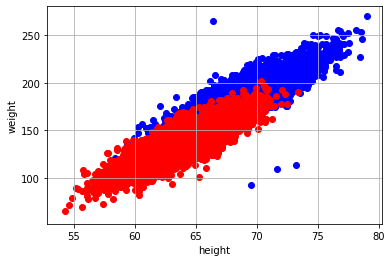

In [6]:
plt.scatter(m_height,m_weight, color='b')
plt.scatter(f_height,f_weight, color='r')
plt.xlabel('height')
plt.ylabel('weight')
plt.grid(True)

In [7]:
#########
#########
#########
#use later
class KNNClassifier:
    def __init__(self):
        self.x = None
        self.y = None
        
    def fit(self, x, y):
        self.x = x
        self.y = y
        
    def _distance(self, a, b):
        a = np.array(a, dtype=float)
        b = np.array(b, dtype=float)
        return np.linalg.norm(a - b)
    
    def predict(self, input_, k):
        # Make sure the data is in a float format instead of strings
        x = np.array(self.x, dtype=float)
        
        # Combine together x and y data into one list of tuples
        xy = list(zip(x, self.y))
        
        # Add distance to each tuple.
        # But what distance is the correct type of distance?
        xy_dist = [(x, y, self._distance(x, input_)) for (x, y) in xy]
        
        # Sort by the distance element in the tuple.
        xy_sorted = sorted(xy_dist, key=lambda x: x[2])
        
        # Pull out the class names from the tuples.
        classes = [i[1] for i in xy_sorted]
        
        # Count the most frequent class,
        c = Counter(classes[:k])

        # Use list comprehension to grab the class from the counter.
        most_common_class = c.most_common(1)[0][0]
        
        return most_common_class